<a href="https://colab.research.google.com/github/ShaileeYadav/Lung-Cancer-Cell-Prediction/blob/main/Lung_Cancer_Cell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lung-cancer-images12000-imagesmostly:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1534406%2F2531988%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240623%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240623T155216Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D45fda2ca8dd256274d1499adc346d2e657e006091ecbcf6548566a98444b36fa4bcebc82b4a00f2654b0bc61555893e159e32b545dc3ebb7cbfe3e5d643ab35b8fdf3ea06344f0abc27c649239321eea68102027d4f8a342eadd4fe62e118607c81cab6eee87e47cd65377af020176e8cf67c7598e9246b373468cd9814ed3b75fa81b415da568916860566aaf1b7bb8297f17f087da059649be020c10141e1bc86098ca9e62c63e7d4ab2d047dcb777b014cb3c0f387e2a4790fb8a0a50fbe218559580b469945617cbc2e6be193fff7e1ad455225f82d39bbac560828053e25b6d741ba41eac633df136f5050db715f44cb7558ea234912418881bbef1d6bf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 928231810 bytes downloaded
Downloaded and uncompressed: lung-cancer-images12000-imagesmostly
Data source import complete.


#Importing Dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc665.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc3916.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc3378.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc2631.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc2579.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc42.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc1136.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc162.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc/lungscc2335.jpeg
/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set

In [ ]:
import os

# Data Exploration

In [ ]:
lung_ac_path= '/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_aca'
lung_n_path= '/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_n'
lung_scc_path= '/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set/lung_scc'

# Count number of samples for each class
num_lung_ac = len(os.listdir(lung_ac_path))
num_lung_n = len(os.listdir(lung_n_path))
num_lung_scc = len(os.listdir(lung_scc_path))

# Print information
print("Number of benign samples:", num_lung_ac)
print("Number of malignant samples:", num_lung_n)
print("Number of normal samples:", num_lung_scc)

Number of benign samples: 4000
Number of malignant samples: 4000
Number of normal samples: 4000


In [ ]:
img_classes = ["lung_ac", "lung_n", "lung_scc"]
path_list = [lung_ac_path, lung_n_path, lung_scc_path]

img_path = []
class_labels = []
for i, dir_list in enumerate(path_list):
    name_img = os.listdir(dir_list)
    for name_file in name_img:
        img = os.path.join(dir_list,name_file)
        img_path.append(img)
        class_labels.append(img_classes[i])

df = pd.DataFrame({"img_path" : img_path,
                  "label" : class_labels})

In [ ]:
df.head()

,img_path,label
0,/kaggle/input/lung-cancer-images12000-imagesmo...,lung_ac
1,/kaggle/input/lung-cancer-images12000-imagesmo...,lung_ac
2,/kaggle/input/lung-cancer-images12000-imagesmo...,lung_ac
3,/kaggle/input/lung-cancer-images12000-imagesmo...,lung_ac
4,/kaggle/input/lung-cancer-images12000-imagesmo...,lung_ac


In [ ]:
from collections import defaultdict
import matplotlib.image as mpimg
# Function to get image shapes and count them
def count_image_shapes(folder_path):
    shape_count = defaultdict(int)
    files = os.listdir(folder_path)
    for file in files:
        img = mpimg.imread(os.path.join(folder_path, file))
        shape_count[img.shape] += 1
    return shape_count

# Count image shapes for each case
lung_ac_shape_count = count_image_shapes(lung_ac_path)
lung_n_shape_count = count_image_shapes(lung_n_path)
lung_scc_shape_count = count_image_shapes(lung_scc_path)

# Print results
print("Shapes and counts for Adenocarcinoma cases:")
for shape, count in lung_ac_shape_count.items():
    print("Shape:", shape, "Count:", count)

print("\nShapes and counts for Neuroendocrine tumors cases:")
for shape, count in lung_n_shape_count.items():
    print("Shape:", shape, "Count:", count)

print("\nShapes and counts for Squamous cell carcinoma cases:")
for shape, count in lung_scc_shape_count.items():
    print("Shape:", shape, "Count:", count)

Shapes and counts for Adenocarcinoma cases:
Shape: (768, 768, 3) Count: 4000

Shapes and counts for Neuroendocrine tumors cases:
Shape: (768, 768, 3) Count: 4000

Shapes and counts for Squamous cell carcinoma cases:
Shape: (768, 768, 3) Count: 4000


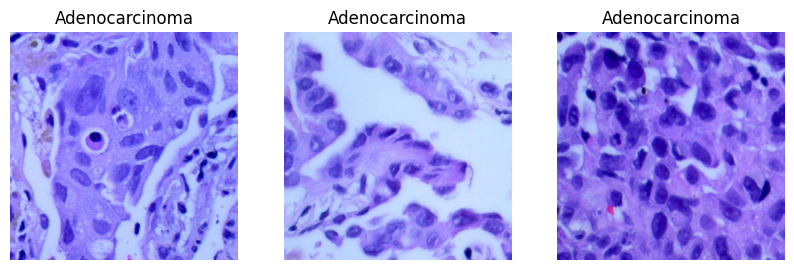

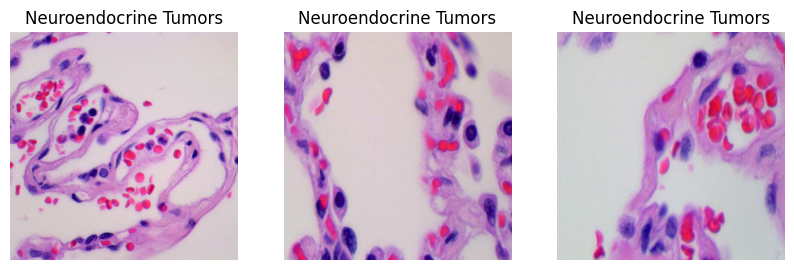

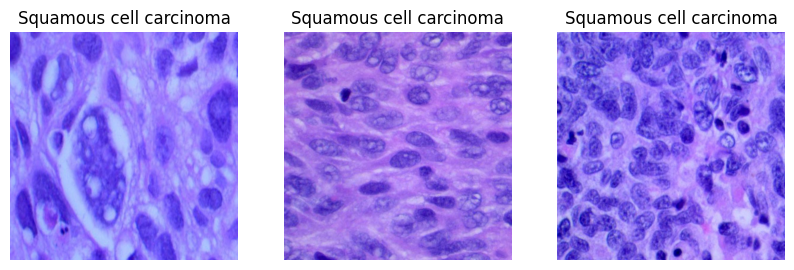

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display images
def display_images(folder_path, label):
    plt.figure(figsize=(10, 5))
    files = os.listdir(folder_path)
    for i in range(3):  # Display first 3 images
        img = mpimg.imread(os.path.join(folder_path, files[i]))
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Display images from each case
display_images(lung_ac_path, "Adenocarcinoma")
display_images(lung_n_path, "Neuroendocrine Tumors")
display_images(lung_scc_path, "Squamous cell carcinoma")

In [ ]:
data_dir='/kaggle/input'
height=224
width=224

# Split Training and Testing Dataset

In [ ]:
import tensorflow as tf

In [ ]:
train_dir='/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/training_set'

In [ ]:
train_df = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(height, width),
    batch_size=32,
    class_names = ['lung_aca', 'lung_n', 'lung_scc'])

Found 12000 files belonging to 3 classes.
Using 9600 files for training.


In [ ]:
test_dir='/kaggle/input/lung-cancer-images12000-imagesmostly/dataset/test_set'

In [ ]:
test_df= tf.keras.utils.image_dataset_from_directory(
            test_dir,
            validation_split=0.2,
            subset="validation",
            seed=123,
            image_size=(height, width), batch_size=32,
            class_names = ['lung_aca', 'lung_n', 'lung_scc']
)

Found 2997 files belonging to 3 classes.
Using 599 files for validation.


#Deep Learning Models

## ResNet

In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Set seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load ResNet50 with pretrained weights
base_model = ResNet50(
   input_shape=(224, 224, 3),
   weights='imagenet',
   include_top=False
)

# Freeze the first 15 layers (adjust as needed)
for layer in base_model.layers[:15]:
   layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(8, activation="sigmoid")(x)

# Create the model
model1 = Model(inputs=base_model.inputs, outputs=predictions)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model1.compile(optimizer='adam',
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history = model1.fit(
    train_df,
    validation_data=test_df,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 [==============================] - 129s 302ms/step - loss: 0.2202 - accuracy: 0.9278 - val_loss: 1156861.7500 - val_accuracy: 0.3255
Epoch 2/5
300/300 [==============================] - 90s 299ms/step - loss: 0.1609 - accuracy: 0.9504 - val_loss: 0.2321 - val_accuracy: 0.9215
Epoch 3/5
300/300 [==============================] - 93s 308ms/step - loss: 0.0691 - accuracy: 0.9747 - val_loss: 0.0291 - val_accuracy: 0.9917
Epoch 4/5
300/300 [==============================] - 92s 306ms/step - loss: 0.0638 - accuracy: 0.9792 - val_loss: 0.0360 - val_accuracy: 0.9883
Epoch 5/5
300/300 [==============================] - 93s 309ms/step - loss: 0.0509 - accuracy: 0.9820 - val_loss: 0.0331 - val_accuracy: 0.9866


In [ ]:
!mkdir -p saved_model
model1.save('/content/saved_model/model1')

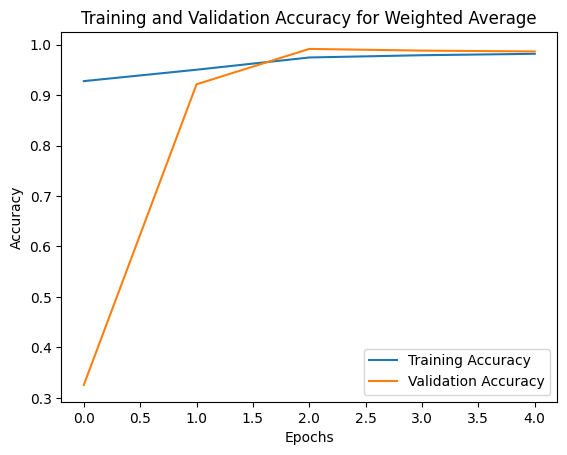

In [ ]:
import matplotlib.pyplot as plt

# Assuming your training history is stored in 'history' variable
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Weighted Average')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## VGG16

In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Set seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load VGG16 with pre-trained weights
base_model = VGG16(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the first 10 layers
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output

# Add some custom layers on top
# x = Conv2D(128, (3, 3), activation='relu')(x)  # Optional additional convolutional layer
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(8, activation="sigmoid")(x)

# Create the model
model2 = Model(inputs=base_model.inputs, outputs=predictions)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model2.compile(optimizer='adam',
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history = model2.fit(
    train_df,
    validation_data=test_df,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 [==============================] - 82s 230ms/step - loss: 2.0064 - accuracy: 0.5211 - val_loss: 0.4055 - val_accuracy: 0.8414
Epoch 2/5
300/300 [==============================] - 63s 207ms/step - loss: 0.4547 - accuracy: 0.8249 - val_loss: 0.2256 - val_accuracy: 0.9165
Epoch 3/5
300/300 [==============================] - 63s 209ms/step - loss: 0.2779 - accuracy: 0.8992 - val_loss: 0.2067 - val_accuracy: 0.9165
Epoch 4/5
300/300 [==============================] - 64s 211ms/step - loss: 0.1760 - accuracy: 0.9341 - val_loss: 0.1383 - val_accuracy: 0.9466
Epoch 5/5
300/300 [==============================] - 64s 212ms/step - loss: 0.2067 - accuracy: 0.9276 - val_loss: 0.1205 - val_accuracy: 0.9399


In [ ]:
!mkdir -p saved_model
model2.save('/content/saved_model/model2')

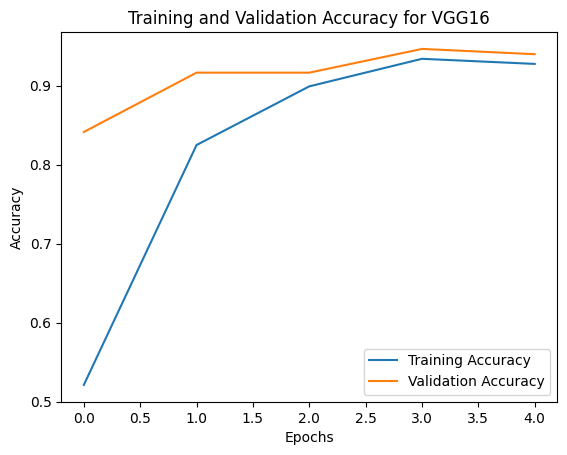

In [ ]:
import matplotlib.pyplot as plt

# Assuming your training history is stored in 'history' variable
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## InceptionV3

In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import os

# Set seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


# Load InceptionV3 with pretrained weights
base_model = InceptionV3(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the first 10 layers
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(8, activation="sigmoid")(x)

# Create the model
model3 = Model(inputs=base_model.inputs, outputs=predictions)

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
model3.compile(optimizer='adam',
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history = model3.fit(
    train_df,
    validation_data=test_df,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 [==============================] - 110s 235ms/step - loss: 0.2500 - accuracy: 0.9152 - val_loss: 0.4313 - val_accuracy: 0.8264
Epoch 2/5
300/300 [==============================] - 67s 222ms/step - loss: 0.1267 - accuracy: 0.9519 - val_loss: 59.8196 - val_accuracy: 0.3873
Epoch 3/5
300/300 [==============================] - 67s 220ms/step - loss: 0.0825 - accuracy: 0.9686 - val_loss: 1.4575 - val_accuracy: 0.6728
Epoch 4/5
300/300 [==============================] - 68s 226ms/step - loss: 0.1082 - accuracy: 0.9656 - val_loss: 4989.9780 - val_accuracy: 0.4474
Epoch 5/5
300/300 [==============================] - 67s 222ms/step - loss: 0.1558 - accuracy: 0.9477 - val_loss: 0.0847 - val_accuracy: 0.9666


In [ ]:
!mkdir -p saved_model
model3.save('/content/saved_model/model3')

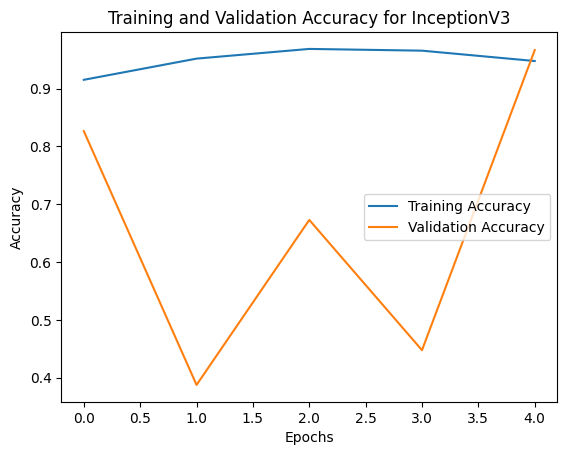

In [ ]:
import matplotlib.pyplot as plt

# Assuming your training history is stored in 'history' variable
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DenseNet

In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import os

# Set seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


# Load DenseNet201 with pretrained weights
base_model = DenseNet201(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the first 10 layers
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
# x = Conv2D(128, (3, 3), activation='relu')(x)  # Optional additional convolutional layer
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(8, activation="sigmoid")(x)


# Create the model
model4 = Model(inputs=base_model.inputs, outputs=predictions)

In [ ]:
model4.compile(optimizer='adam',
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history = model4.fit(
    train_df,
    validation_data=test_df,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 [==============================] - 296s 585ms/step - loss: 0.1880 - accuracy: 0.9284 - val_loss: 3.6961 - val_accuracy: 0.7062
Epoch 2/5
300/300 [==============================] - 167s 555ms/step - loss: 0.1066 - accuracy: 0.9600 - val_loss: 7.6743 - val_accuracy: 0.7045
Epoch 3/5
300/300 [==============================] - 167s 554ms/step - loss: 0.0705 - accuracy: 0.9748 - val_loss: 0.0352 - val_accuracy: 0.9833
Epoch 4/5
300/300 [==============================] - 169s 560ms/step - loss: 0.0532 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy: 0.9783
Epoch 5/5
300/300 [==============================] - 167s 556ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0542 - val_accuracy: 0.9816


In [ ]:
!mkdir -p saved_model
model4.save('/content/saved_model/model4')

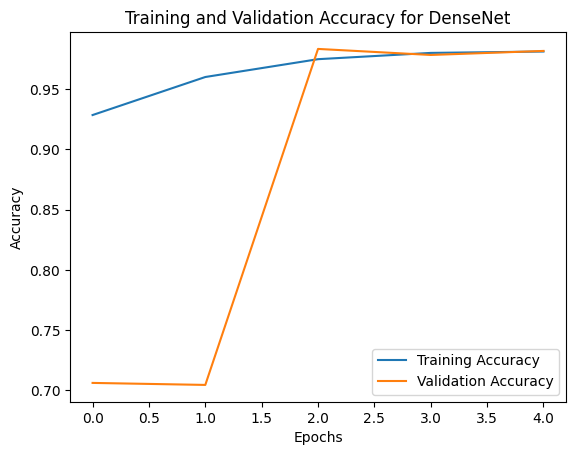

In [ ]:
import matplotlib.pyplot as plt

# Assuming your training history is stored in 'history' variable
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for DenseNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Average Ensemble

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
import numpy as np

# Load the individual models
n1 = load_model('/content/saved_model/model1')
n1 = Model(inputs=n1.inputs, outputs=n1.outputs, name="model1")

n2 = load_model('/content/saved_model/model2')
n2 = Model(inputs=n2.inputs, outputs=n2.outputs, name="model2")

n3 = load_model('/content/saved_model/model3')
n3 = Model(inputs=n3.inputs, outputs=n3.outputs, name="model3")

n4 = load_model('/content/saved_model/model4')
n4 = Model(inputs=n4.inputs, outputs=n4.outputs, name="model4")

models = [n1, n2, n3, n4]

In [ ]:
# Create an input layer
model_input = tf.keras.Input(shape=(224,224,3))

# Get the outputs of each model
model_outputs = [model(model_input) for model in models]

# Average the outputs to create the ensemble output
ensemble_output = tf.keras.layers.Average()(model_outputs)

# Define the ensemble model
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [ ]:
ensemble_model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history=ensemble_model.fit(
    train_df,
    validation_data=test_df,
    epochs=5)

Epoch 1/5
300/300 [==============================] - 540s 1s/step - loss: 1.3652 - accuracy: 0.9731 - val_loss: 1.5048 - val_accuracy: 0.8197
Epoch 2/5
300/300 [==============================] - 363s 1s/step - loss: 1.4432 - accuracy: 0.9670 - val_loss: 1.5976 - val_accuracy: 0.6795
Epoch 3/5
300/300 [==============================] - 367s 1s/step - loss: 1.4414 - accuracy: 0.9685 - val_loss: 1.5476 - val_accuracy: 0.9349
Epoch 4/5
300/300 [==============================] - 364s 1s/step - loss: 1.4429 - accuracy: 0.9718 - val_loss: 1.4520 - val_accuracy: 0.9432
Epoch 5/5
300/300 [==============================] - 363s 1s/step - loss: 1.4398 - accuracy: 0.9705 - val_loss: 1.5003 - val_accuracy: 0.7963


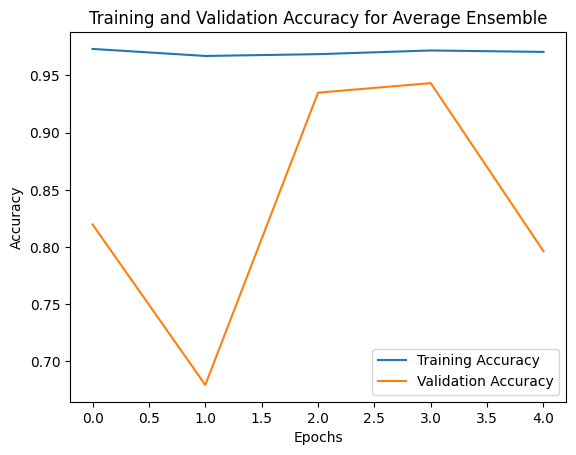

In [ ]:
import matplotlib.pyplot as plt

# Assuming your training history is stored in 'history' variable
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Average Ensemble')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Weighted Average Ensemble

In [ ]:
class WeightedAverageLayer(tf.keras.layers.Layer):
    def __init__(self, w1, w2, w3, w4, **kwargs):
        super(WeightedAverageLayer, self).__init__(**kwargs)
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3
        self.w4 = w4

    def call(self, inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1]+ self.w3 * inputs[2] + self.w4 * inputs[3]


In [ ]:
ensemble_output2 = WeightedAverageLayer(0.4, 0.1, 0.2, 0.3)(model_outputs)
ensemble_model2 =tf.keras.Model(inputs=model_input, outputs=ensemble_output2)

In [ ]:
ensemble_model2.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history=ensemble_model2.fit(
        train_df,
        validation_data=test_df,
        epochs=5)

Epoch 1/5
300/300 [==============================] - 369s 1s/step - loss: 1.3529 - accuracy: 0.9786 - val_loss: 1.3992 - val_accuracy: 0.9833
Epoch 2/5
300/300 [==============================] - 379s 1s/step - loss: 1.3504 - accuracy: 0.9815 - val_loss: 1.4169 - val_accuracy: 0.9750
Epoch 3/5
300/300 [==============================] - 378s 1s/step - loss: 1.3485 - accuracy: 0.9819 - val_loss: 1.3910 - val_accuracy: 0.9800
Epoch 4/5
300/300 [==============================] - 377s 1s/step - loss: 1.3480 - accuracy: 0.9866 - val_loss: 1.4470 - val_accuracy: 0.9783
Epoch 5/5
300/300 [==============================] - 377s 1s/step - loss: 1.3459 - accuracy: 0.9880 - val_loss: 1.3509 - val_accuracy: 0.9883


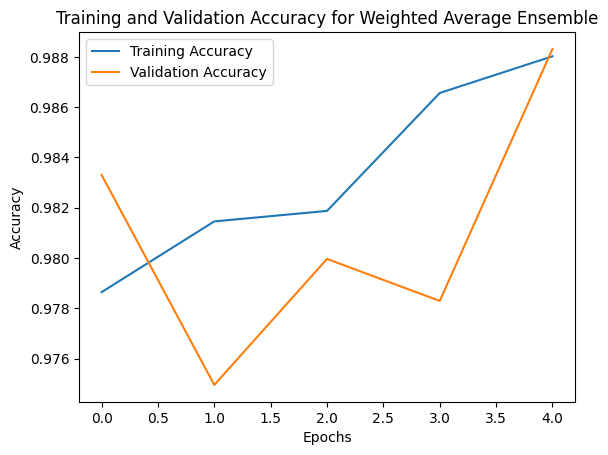

In [ ]:
import matplotlib.pyplot as plt

# Assuming your training history is stored in 'history' variable
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Weighted Average Ensemble')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()